In [1]:
import matplotlib.pyplot as plt
import timeit
import random

In [2]:
def fastest_way(a, t, e, x, n):
    f1 = [0] * (n + 1)
    f2 = [0] * (n + 1)
    l1 = [0] * (n + 1)
    l2 = [0] * (n + 1)

    # Inicializar os primeiros valores da estação
    f1[1] = e[0] + a[0][0]
    f2[1] = e[1] + a[1][0]

    # Calculo do tempo mais rápido para cada estação
    for j in range(2, n + 1):
        if f1[j - 1] + a[0][j - 1] <= f2[j - 1] + t[1][j - 2] + a[0][j - 1]:
            f1[j] = f1[j - 1] + a[0][j - 1]
            l1[j] = 1
        else:
            f1[j] = f2[j - 1] + t[1][j - 2] + a[0][j - 1]
            l1[j] = 2

        if f2[j - 1] + a[1][j - 1] <= f1[j - 1] + t[0][j - 2] + a[1][j - 1]:
            f2[j] = f2[j - 1] + a[1][j - 1]
            l2[j] = 2
        else:
            f2[j] = f1[j - 1] + t[0][j - 2] + a[1][j - 1]
            l2[j] = 1

    # Determinar o tempo mais rápido e a linha com o tempo mínimo
    if f1[n] + x[0] <= f2[n] + x[1]:
        f_star = sum(f1) + x[0]
        l_star = 1
    else:
        f_star = sum(f2) + x[1]
        l_star = 2

    return f_star, l_star, l1, l2

In [3]:
def gredy_way(a, t, e, x, n):
    f = [[0] * (n + 1) for _ in range(2)]  # Matriz de tempo mais rápida
    f1 = [0] * (n + 1)
    f2 = [0] * (n + 1)
    # Matriz de escolhas de linha
    l1 = [0] * (n + 1)
    l2 = [0] * (n + 1)

    # Inicializar os primeiros valores da estação
    f[0][1] = e[0] + a[0][0]
    f[1][1] = e[1] + a[1][0]

    # Calculo do tempo mais rápido para cada estação
    for j in range(2, n + 1):
        f1[j] = min(f1[j - 1] + a[0][j - 1], f2[j - 1] + t[1][j - 2] + a[0][j - 1])
        f2[j] = min(f2[j - 1] + a[1][j - 1], f1[j - 1] + t[0][j - 2] + a[1][j - 1])

        if f1[j - 1] + a[0][j - 1] <= f2[j - 1] + t[1][j - 2] + a[0][j - 1]:
          l1[j] = 1
        else:
          l1[j] = 2
        if f2[j - 1] + a[1][j - 1] <= f1[j - 1] + t[0][j - 2] + a[1][j - 1]:
          l2[j] = 2
        else:
          l2[j] = 1

    # Determinar o tempo mais rápido e a linha com o tempo mínimo
    f_star = min(f1[n] + x[0], f2[n] + x[1])
    l_star = 1 if f1[n] + x[0] <= f2[n] + x[1] else 2

    return f_star, l_star, l1, l2

In [4]:
def print_stations(l1, l2, l_star, f_star, n):
    route = [(l_star, n)]

    print(f'Tempo mais rápido: {f_star}')
    print(f'Linha mais rápido: {l_star}')

    i = l_star
    for j in range(n, 1, -1):
        if i == 1:
            i = l1[j]
        else:
            i = l2[j]

        route.append((i, j - 1))

    route.reverse()

    print("Rota mais curta:")
    for line, station in route:
        print("Linha:", line, "Estação:", station)

In [5]:
# Gera as entradas
def generate_entries():
  n =  random.randint(1,10)

  # Gera os tempos de processamento aleatórios em cada estação
  a = [[random.randint(1, 10) for _ in range(n)] for _ in range(2)]

  # Gera os tempos de transferência aleatórios entre linhas
  t = [[random.randint(1, 5) for _ in range(n-1)] for _ in range(2)]

  # Gerar os tempos de entrada aleatórios
  e = [random.randint(1, 5) for _ in range(2)]

  # Gerar os tempos de saída aleatórios
  x = [random.randint(1, 5) for _ in range(2)]

  return n, a, t, e, x

In [6]:
n, a, t, e, x = generate_entries()

f_star, l_star, l1, l2 = fastest_way(a, t, e, x, n)

print_stations(l1=l1, l2=l2, f_star=f_star, l_star=l_star, n=n)

Tempo mais rápido: 79
Linha mais rápido: 1
Rota mais curta:
Linha: 2 Estação: 1
Linha: 2 Estação: 2
Linha: 2 Estação: 3
Linha: 1 Estação: 4
Linha: 1 Estação: 5


In [7]:
n, a, t, e, x = generate_entries()

f_star, l_star, l1, l2 = gredy_way(a, t, e, x, n)

print_stations(l1=l1, l2=l2, f_star=f_star, l_star=l_star, n=n)

Tempo mais rápido: 31
Linha mais rápido: 1
Rota mais curta:
Linha: 1 Estação: 1
Linha: 1 Estação: 2
Linha: 1 Estação: 3
Linha: 2 Estação: 4
Linha: 2 Estação: 5
Linha: 2 Estação: 6
Linha: 1 Estação: 7


In [8]:
# Função para medir o tempo de execução da função fastest_way
def measure_execution_time_iterative():
  n, a, t, e, x = generate_entries()

  fastest_way(a, t, e, x, n)

# Medir os tempos de execução da função e armazena as médias em uma lista
num_runs = 20
average_execution_times_iterative = []
for _ in range(num_runs):
    execution_time = timeit.timeit(measure_execution_time_iterative, number=10)
    average_execution_times_iterative.append(execution_time)

print("Tempos médios de execução:", average_execution_times_iterative)

Tempos médios de execução: [0.00044962600031794864, 0.000530203999915102, 0.00045012000009592157, 0.00038447399992946885, 0.0003751149997697212, 0.00034358599987172056, 0.00046148699993864284, 0.0008914800000638934, 0.0006917729997439892, 0.0005667350001203886, 0.0006429179998121981, 0.0005351780000637518, 0.0006287369997153291, 0.0004184049998912087, 0.0004936979999001778, 0.00047088700011954643, 0.005335369000022183, 0.0012700130000666832, 0.0007662779999009217, 0.0005450019998534117]


In [9]:
# Função para medir o tempo de execução da função greedy_way
def measure_execution_time_greed():
  n, a, t, e, x = generate_entries()

  gredy_way(a, t, e, x, n)

# Medir os tempos de execução da função e armazena as médias em uma lista
num_runs = 20
average_execution_times_greedy = []
for _ in range(num_runs):
    execution_time = timeit.timeit(measure_execution_time_greed, number=10)
    average_execution_times_greedy.append(execution_time)

print("Tempos médios de execução:", average_execution_times_greedy)


Tempos médios de execução: [0.0007886789999247412, 0.0006466610002462403, 0.0007836419999875943, 0.0006472949999078992, 0.0014586249999410938, 0.0007044809999570134, 0.0006632869999521063, 0.0004019140001219057, 0.0003285290003987029, 0.0023413809999510704, 0.0008255750003627327, 0.0006280890002017259, 0.000616407000052277, 0.000668107999899803, 0.0005068129999017401, 0.0005135989999871526, 0.0004093670004294836, 0.0005130300000928401, 0.0005210690001149487, 0.0007191780000539438]


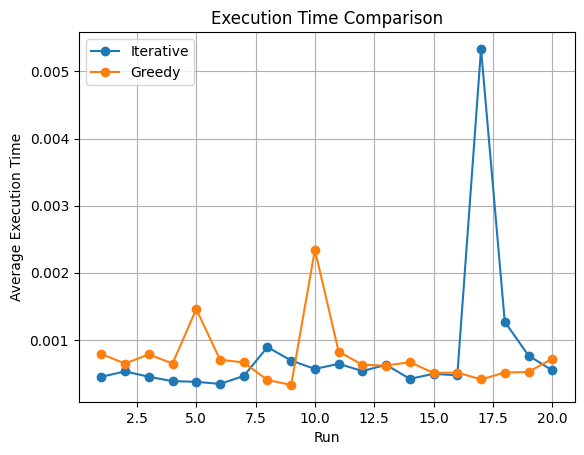

In [10]:
plt.plot(range(1, num_runs+1), average_execution_times_iterative, marker='o', label='Iterative')
plt.plot(range(1, num_runs+1), average_execution_times_greedy, marker='o', label='Greedy')
plt.xlabel('Run')
plt.ylabel('Average Execution Time')
plt.title('Execution Time Comparison')
plt.legend()
plt.grid(True)
plt.show()